In [1]:
!pip install rdkit
!pip install pandas
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors, Draw
import pandas as pd

In [2]:
# Read the data
df = pd.read_csv("../data/new.csv", names=["Name","year","compound", "Smiles"], header=None,sep=";")
df

,Name,year,compound,Smiles
0,Gefitinib,2003,CHEMBL939,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1
1,Erlotinib,2004,CHEMBL553,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1
2,Lapatinib,2007,CHEMBL554,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...
3,Afatinib,2013,CHEMBL1173655,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...
4,Osmertinib,2015,CHEMBL3353410,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...


In [3]:
df.columns

Index(['Name', 'year', 'compound', 'Smiles'], dtype='object')

In [4]:
smiles = df.Smiles.tolist() # convert to list
names = df.Name.tolist() # convert to list

print(smiles[0], names[0])# print first smiles and name

COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1 Gefitinib


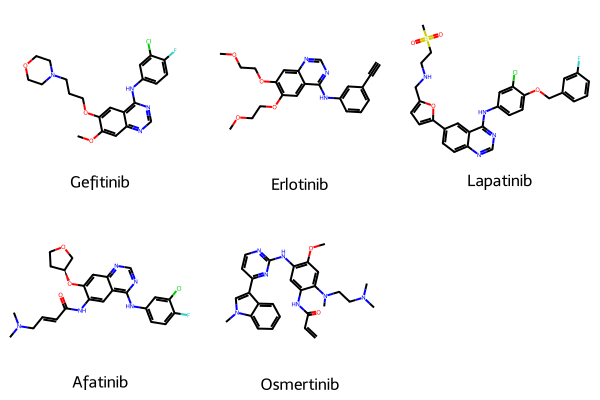

In [5]:
molecules = [Chem.MolFromSmiles(s) for s in smiles]# convert smiles to molecules
Draw.MolsToGridImage(molecules, legends=names)# draw molecules

In [6]:
# Calculate Morgan Fingerprints
morgantable = pd.DataFrame(index=names, columns=names)
for i in range(len(molecules)):
    for j in range(len(molecules)):
        fp1 = AllChem.GetMorganFingerprint(molecules[i], radius = 2)
        fp2 = AllChem.GetMorganFingerprint(molecules[j], radius = 2)
        dice_similarity = DataStructs.DiceSimilarity(fp1, fp2)
        morgantable.loc[names[i], names[j]] = dice_similarity
print(morgantable)

           Gefitinib Erlotinib Lapatinib  Afatinib Osmertinib
Gefitinib        1.0  0.597701  0.507317  0.641711   0.340206
Erlotinib   0.597701       1.0  0.472362  0.475138   0.340426
Lapatinib   0.507317  0.472362       1.0  0.481132     0.3379
Afatinib    0.641711  0.475138  0.481132       1.0    0.41791
Osmertinib  0.340206  0.340426    0.3379   0.41791        1.0


[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerator
[13:36:41] DEPRECATION WARNING: please use MorganGenerat

In [7]:
# Calculate MACCS Fingerprints
from rdkit.Chem import MACCSkeys
maccstable = pd.DataFrame(index=names, columns=names)
for i in range(len(molecules)):
    for j in range(len(molecules)):
        fp1 = MACCSkeys.GenMACCSKeys(molecules[i])
        fp2 = MACCSkeys.GenMACCSKeys(molecules[j])
        dice_similarity = DataStructs.DiceSimilarity(fp1, fp2)
        maccstable.loc[names[i], names[j]] = dice_similarity
print(maccstable)

           Gefitinib Erlotinib Lapatinib  Afatinib Osmertinib
Gefitinib        1.0  0.818182   0.80292  0.876923   0.740157
Erlotinib   0.818182       1.0  0.740157  0.783333   0.735043
Lapatinib    0.80292  0.740157       1.0  0.789116   0.694444
Afatinib    0.876923  0.783333  0.789116       1.0   0.832117
Osmertinib  0.740157  0.735043  0.694444  0.832117        1.0


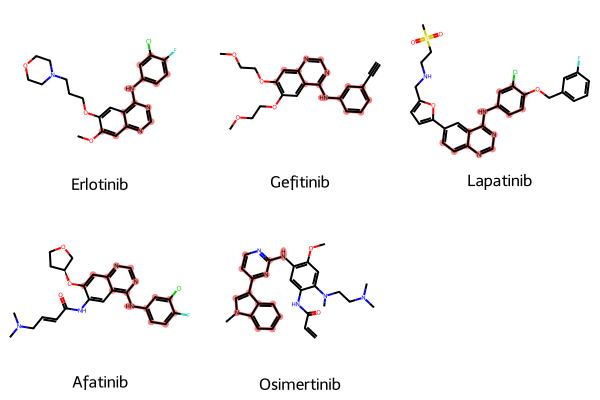

In [8]:
#draw the molecules
from rdkit.Chem import rdFMCS
res=rdFMCS.FindMCS(molecules)
mcs=Chem.MolFromSmarts(res.smartsString)
Draw.MolsToGridImage([mcs])
highlighted_atms=[mol.GetSubstructMatch(mcs) for mol in molecules]
Draw.MolsToGridImage(molecules,highlightAtomLists=highlighted_atms, legends=['Erlotinib', 'Gefitinib', 'Lapatinib', 'Afatinib', 'Osimertinib'])


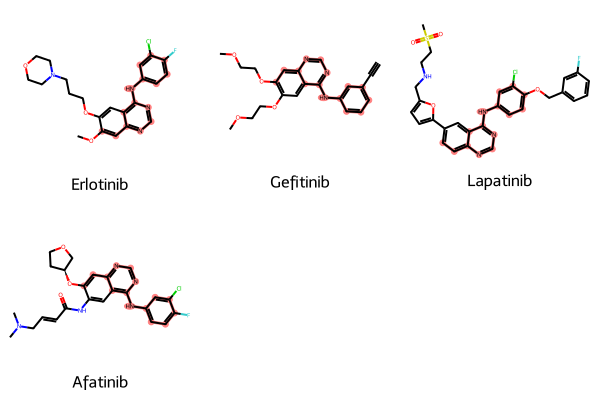

In [9]:
from rdkit.Chem import rdFMCS
res=rdFMCS.FindMCS(molecules)
mcs=Chem.MolFromSmarts(res.smartsString)
Draw.MolsToGridImage([mcs])
highlighted_atms=[mol.GetSubstructMatch(mcs) for mol in molecules]
Draw.MolsToGridImage(molecules[:-1],highlightAtomLists=highlighted_atms[:-1], legends=['Erlotinib', 'Gefitinib', 'Lapatinib', 'Afatinib'])

In [10]:
#table with molecular mw, hba, hbd, logp
df2 = df.filter(['Name'], axis=1)
df2["Mw"] , df2["HBA"], df2["HBD"],df2["log_p"] = "", "", "", ""
for i in range(len(molecules)):
    df2["Mw"][i] = Descriptors.MolWt(molecules[i])
    df2["HBA"][i] = Descriptors.NumHAcceptors(molecules[i])
    df2["HBD"][i] = Descriptors.NumHDonors(molecules[i])
    df2["log_p"][i] = Descriptors.MolLogP(molecules[i])

df2

/var/folders/ts/vqxzv1017qb02q48zs_jkpch0000gn/T/ipykernel_44723/3362081202.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2["Mw"][i] = Descriptors.MolWt(molecules[i])
/var/folders/ts/vqxzv1017qb02q48zs_jkpch0000gn/T/ipykernel_44723/3

,Name,Mw,HBA,HBD,log_p
0,Gefitinib,446.91,7,1,4.2756
1,Erlotinib,393.443,7,1,3.4051
2,Lapatinib,581.069,8,2,6.1391
3,Afatinib,485.947,7,2,4.3899
4,Osmertinib,499.619,8,2,4.5098


In [11]:
molecules2 = [Chem.MolFromSmiles(s) for s in smiles]# convert smiles to molecules,second time
print(molecules2)

[<rdkit.Chem.rdchem.Mol object at 0x11f6b3a70>, <rdkit.Chem.rdchem.Mol object at 0x11f6b2b90>, <rdkit.Chem.rdchem.Mol object at 0x11f6b3b50>, <rdkit.Chem.rdchem.Mol object at 0x11f6b3c30>, <rdkit.Chem.rdchem.Mol object at 0x11f6b3ca0>]


In [12]:
import rdkit.Chem.Descriptors as Descriptors
# function to calculate lipinski's rule of 5
def lipinski(molecules2):
    count = 0
    for i in molecules2:
        if Descriptors.NumHAcceptors(i) <= 10 and Descriptors.NumHDonors(i) <= 5 and Descriptors.MolWt(i) <= 500 and Descriptors.MolLogP(i) <= 5:
            count += 1
        return count  
print(lipinski(molecules2))

1


In [13]:
import pandas as pd
import numpy as np
np.random.seed(123)

In [14]:
df = pd.read_csv("../data/CHEMBL25_activities_EGFR.csv")
df.head()
df_all = df['canonical_smiles']
print(df_all)
smiles_df = df_all.tolist()
for smiles in smiles_df: 
    molecules_all = Chem.MolFromSmiles(smiles)


0           Fc1cccc(COc2ccc(Nc3ncncc3C#Cc4ncccn4)cc2Cl)c1
1       Fc1ccc(Nc2ncnc3cc4OC(=O)N(CCOC(=O)CCl)c4cc23)c...
2       CC(C)n1c(Nc2cccc(c2)C(F)(F)F)nc3cnc(Nc4ccc(cc4...
3       CS(=O)(=O)CCNC(=O)O[C@H]1CN[C@@H](C1)C#Cc2cc3n...
4       Cn1c(SSc2c(C(=O)NCC(O)CO)c3ccccc3n2C)c(C(=O)NC...
                              ...                        
3901                  CCc1ccc(Nc2ncnc3[nH]c(C)c(C)c23)cc1
3902                 Brc1cccc(CC(=O)NS(=O)(=O)c2ccccc2)c1
3903    CN(C)CCC(=O)NCCOc1cc2ncnc(Nc3ccc(Br)cc3F)c2cc1...
3904           COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCCC=C
3905    CN(C)Cc1ccc([nH]1)c2cc3ncnc(Nc4ccc(OCc5cccc(F)...
Name: canonical_smiles, Length: 3906, dtype: object


In [15]:
df_actives = df[df['pIC50'] < 6.3]#sorting the actives
df_actives.head()

,Unnamed: 0,chembl_id,IC50,units,canonical_smiles,pIC50
4,1084,CHEMBL158797,43000.0,nM,Cn1c(SSc2c(C(=O)NCC(O)CO)c3ccccc3n2C)c(C(=O)NC...,4.366532
10,3047,CHEMBL591706,32120.0,nM,CCCCN(Cc1cccc(Cl)c1O)C(=O)Nc2ccccc2,4.493224
15,91,CHEMBL78150,460000.0,nM,CC(C)(C)c1cc(C=C(C#N)C#N)cc(c1O)C(C)(C)C,3.337242
16,3342,CHEMBL1241948,100000.0,nM,CC(C)n1nc(c2cccc(NS(=O)(=O)C)c2)c3c(N)ncnc13,4.000000
17,4864,CHEMBL3233765,3399.0,nM,CN1CCN(CC(=O)Nc2cc3c(Nc4ccc(F)c(Cl)c4)ncnc3s2)CC1,5.468649


In [16]:
df_inactives = df[df['pIC50'] >= 6.3]#sorting the inactives
df_inactives.head()

,Unnamed: 0,chembl_id,IC50,units,canonical_smiles,pIC50
0,1777,CHEMBL207869,77.0,nM,Fc1cccc(COc2ccc(Nc3ncncc3C#Cc4ncccn4)cc2Cl)c1,7.113509
1,5785,CHEMBL3940060,330.0,nM,Fc1ccc(Nc2ncnc3cc4OC(=O)N(CCOC(=O)CCl)c4cc23)c...,6.481486
2,6373,CHEMBL3678951,1.0,nM,CC(C)n1c(Nc2cccc(c2)C(F)(F)F)nc3cnc(Nc4ccc(cc4...,9.000000
3,2442,CHEMBL504034,40.0,nM,CS(=O)(=O)CCNC(=O)O[C@H]1CN[C@@H](C1)C#Cc2cc3n...,7.397940
5,6596,CHEMBL4069003,3.0,nM,NP(=O)(OCCCOc1ccc2ncnc(Nc3cccc(Br)c3)c2c1)N(CC...,8.522879


In [17]:
smiles_active = df_actives["canonical_smiles"].tolist()
smiles_inactive = df_inactives["canonical_smiles"].tolist()

In [18]:
#morgan fingerprints
from rdkit import Chem
from rdkit.Chem import AllChem

fingerprints_active = []
fingerprints_inactive = []

for smiles in smiles_active: 
    molecule = Chem.MolFromSmiles(smiles)
    fingerprints_active.append(AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=1024))

for smiles in smiles_inactive:
    molecule = Chem.MolFromSmiles(smiles)
    fingerprints_inactive.append(AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=1024))

[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerator
[13:36:47] DEPRECATION WARNING: please use MorganGenerat

In [19]:
#maccs fingerprints
from rdkit import Chem
from rdkit.Chem import AllChem

fingerprintsmaccs_active = []
fingerprintsmaccs_inactive = []

for smiles in smiles_active: 
    molecule = Chem.MolFromSmiles(smiles)
    fingerprintsmaccs_active.append(MACCSkeys.GenMACCSKeys(molecule))

for smiles in smiles_inactive:
    molecule = Chem.MolFromSmiles(smiles)
    fingerprintsmaccs_inactive.append(MACCSkeys.GenMACCSKeys(molecule))

In [20]:
fps = fingerprints_active + fingerprints_inactive
fpsmaccs = fingerprintsmaccs_active + fingerprintsmaccs_inactive

In [21]:
y_active = np.ones(len(fingerprints_active))
y_active
y_activemaccs = np.ones(len(fingerprintsmaccs_active))
y_activemaccs

array([1., 1., 1., ..., 1., 1., 1.], shape=(1692,))

In [22]:
y_inactive = np.zeros(len(fingerprints_inactive))
y_inactive
y_inactivemaccs = np.zeros(len(fingerprintsmaccs_inactive))
y_inactivemaccs

array([0., 0., 0., ..., 0., 0., 0.], shape=(2214,))

In [23]:
y = np.concatenate([y_active, y_inactive])
ymaccs= np.concatenate([y_activemaccs, y_inactivemaccs])

In [24]:
!pip install -U scikit-learn
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(fps, y, test_size=0.20,random_state=1234)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [27]:
forest = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_features=100,random_state=0)

In [28]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=100, n_jobs=-1, random_state=0)

In [29]:
from sklearn.metrics import recall_score

In [30]:
y_pred = forest.predict(X_test) 
y_pred[:10]


array([1., 0., 1., 1., 0., 1., 1., 0., 1., 1.])

In [31]:
y_prob = forest.predict_proba(X_test)
y_prob[:10]


array([[0.37      , 0.63      ],
       [0.76      , 0.24      ],
       [0.21166667, 0.78833333],
       [0.07      , 0.93      ],
       [0.51      , 0.49      ],
       [0.04      , 0.96      ],
       [0.04      , 0.96      ],
       [0.915     , 0.085     ],
       [0.1       , 0.9       ],
       [0.34      , 0.66      ]])

In [32]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.87


In [33]:
roc_auc = metrics.roc_auc_score(y_test, y_prob[:,1])  
print(f"Model AUC: {roc_auc:.2f}")


Model AUC: 0.93


In [34]:
auc = metrics.roc_auc_score(y_test, y_pred)

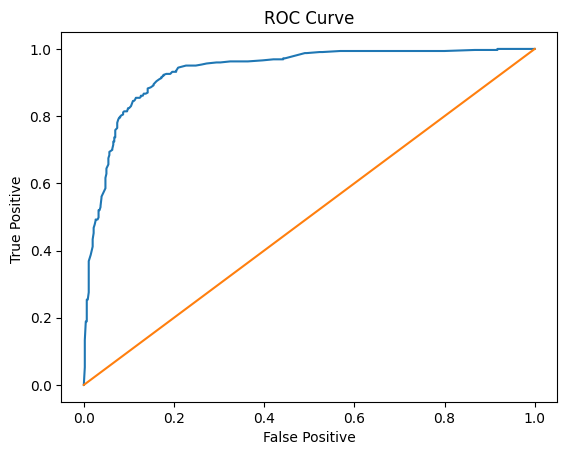

In [35]:
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])


# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.xlabel('False Positive')
plt.ylabel('True Positive ')
plt.plot([0, 1], [0, 1])
plt.title('ROC Curve')
plt.show()

In [36]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
skf.get_n_splits(fps, y)


5

In [76]:
dataFrames=pd.DataFrame(columns=["Accuracy","AUC","Sensitivity","Specificity"])
accu = []
sensit = []
specifi = []
aucList = []
models = []
for train_index, test_index in skf.split(fps, y):
    X_train, X_test = [fps[i] for i in train_index], [fps[i] for i in test_index]
    y_train, y_test = y[train_index], y[test_index]
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    y_prob = forest.predict_proba(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_prob[:,1])
    auc = metrics.roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
    accu.append(accuracy)
    aucList.append(roc_auc)
    sensit.append(tpr[1])
    specifi.append(1-fpr[1])
    models.append(forest)
    dataFrames.loc[len(dataFrames)]=[accuracy,roc_auc,tpr[1],1-fpr[1]]


In [77]:
dataFrames["Sum"] = dataFrames["Accuracy"]+dataFrames["AUC"]+dataFrames["Sensitivity"]+dataFrames["Specificity"]
dataFrames

,Accuracy,AUC,Sensitivity,Specificity,Sum
0,0.863171,0.927089,0.050147,1.000000,2.840408
1,0.860435,0.916580,0.041298,0.997738,2.816051
2,0.856594,0.921437,0.044379,1.000000,2.822410
3,0.856594,0.916869,0.071006,0.995485,2.839955
4,0.860435,0.922406,0.035503,0.995485,2.813829


In [83]:
dataFrames=pd.DataFrame(columns=["Accuracy","AUC","Sensitivity","Specificity"])
topredict = pd.read_csv("../data/test_compounds_EGFR.csv")
topredict.head()

,Unnamed: 0,chembl_id,canonical_smiles
0,1927,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c4ccccc24)cc1
1,212,CHEMBL107472,CNc1ncc2C=C(C(=O)N(C)c2n1)c3c(Cl)cccc3Cl
2,3089,CHEMBL1077068,CC1=C(C(NC(=N1)Nc2ccc(cc2)S(=O)(=O)Nc3ncccn3)c...
3,3126,CHEMBL1088240,COc1cc(Nc2c(cnc3cc(\C=C\CCN4CCN(C)CC4)c(OC)cc2...
4,3125,CHEMBL1092382,CCC(=O)Nc1ccc2nccc(Nc3cccc(Br)c3)c2c1


In [84]:
#using morgan fingerprint with radius 2
final = []
final2 = []
molecules2 = [Chem.MolFromSmiles(mol) for mol in topredict["canonical_smiles"]]
fingerprintsmorgan = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024) for mol in molecules2]
predictmorgan = forest.predict(fingerprintsmorgan)
for i,j in zip(molecules2,predictmorgan):
    if j == 1:
        final.append(i)
print(len(final))

403


In [85]:
final2= []
lipin = []
import rdkit.Chem.Descriptors as Descriptors
for i in final:
    if Descriptors.NumHAcceptors(i) <= 10 and Descriptors.NumHDonors(i) <= 5 and Descriptors.MolWt(i) <= 500 and Descriptors.MolLogP(i) <= 5:
        final2.append(i)

In [86]:
print(len(final2))
fingerprintsmorgan = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024) for mol in final2]

272


In [87]:
from rdkit.ML.Cluster import Butina
from rdkit import DataStructs
import numpy as np

num_fps = len(fingerprintsmorgan)
dissim_matrix = np.zeros((num_fps, num_fps))
for i in range(num_fps):
    for j in range(i, num_fps):
        sim = DataStructs.TanimotoSimilarity(fingerprintsmorgan[i], fingerprintsmorgan[j])
        dissim = 1 - sim
        dissim_matrix[i][j] = dissim
        dissim_matrix[j][i] = dissim
#shape of the matrix
print(dissim_matrix.shape)
cutoff = 0.825
distances = dissim_matrix[np.triu_indices(num_fps, k=1)].tolist()
clusters = Butina.ClusterData(distances, len(fingerprintsmorgan), cutoff, isDistData=True)


(272, 272)


In [88]:
#selecting the first element of each cluster
first_elems = []
for cluster_idx in range(len(clusters)):
    cluster_members = clusters[cluster_idx]
    if len(cluster_members) > 0:
        first_elem = cluster_members[0]
        mol = final2[first_elem]
        first_elems.append(mol)
print(len(first_elems))

20


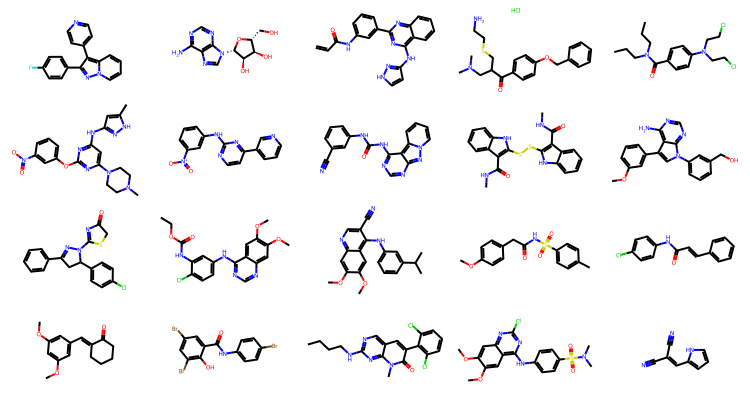

In [89]:
#draw the molecules in first_elem
from rdkit.Chem import Draw
Draw.MolsToGridImage(first_elems, molsPerRow=5, subImgSize=(150,100))


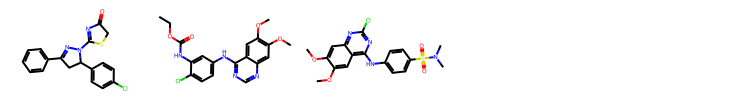

In [90]:
#three selected compounds
three_compounds = [first_elems[10], first_elems[11], first_elems[18]]
Draw.MolsToGridImage(three_compounds, molsPerRow=5, subImgSize=(150,100))


In [ ]:
from rdkit import Chem

w = Chem.SDWriter('final_compounds1.sdf')

for i in first_elems:
    w.write(i)

w.close()

In [42]:
!pip3 install torch torchvision torchaudio

import torch

In [57]:
x = torch.rand(2,2)
y=torch.rand(2,2)
print(x)
print(y)
y.add_(x)

tensor([[0.6536, 0.8611],
        [0.5944, 0.5452]])
tensor([[0.3944, 0.3542],
        [0.4926, 0.7730]])


tensor([[1.0480, 1.2153],
        [1.0870, 1.3182]])